##### 5월 16일 시험 문제 
##### 공부 범위: 이상치, 병합, 정렬 , 변환, 사용자 정의 함수

##### 1. iris.csv 파일을 사용해서, 평균을 기준으로 1.5 표준편차를 넘어서는 값을 이상치라고 간주할 때, Sepal.Length 변수를 기준으로 이상치은 row 개수는 몇개인가?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
m1 = df['Sepal.Length'].mean()
v1 = df['Sepal.Length'].std()

print(m1) 
print(v1) 

5.843333333333334
0.828066127977863


In [13]:
len(df[(df['Sepal.Length'] > m1 + 1.5*v1) | (df['Sepal.Length'] < m1 - 1.5*v1)])

21

##### 2. join_data_group_members.csv 를 join_data_member_room.csv에 left join 하였을 때의 결측 행의 갯수는?

In [23]:
df1 = pd.read_csv("./join_data_group_members.csv")
df1.head()

,team,No,member
0,TWICE,1414,미나
1,TWICE,1462,나연
2,TWICE,1178,다현
3,TWICE,1525,정연
4,TWICE,1194,지효


In [24]:
df2 = pd.read_csv("./join_data_member_room.csv")
df2.head()

,floor,room,name
0,3,3G-A,미나
1,3,3G-B,나연
2,3,3G-C,다현
3,4,4G-A,정연
4,4,4G-B,지효


In [26]:
df3 = pd.merge(left = df1, right = df2, 
               left_on = 'member', right_on = 'name', how = 'left')
df3.head()

,team,No,member,floor,room,name
0,TWICE,1414,미나,3.0,3G-A,미나
1,TWICE,1462,나연,3.0,3G-B,나연
2,TWICE,1178,다현,3.0,3G-C,다현
3,TWICE,1525,정연,4.0,4G-A,정연
4,TWICE,1194,지효,4.0,4G-B,지효


In [30]:
df3.isnull().sum()

team      0
No        0
member    0
floor     5
room      5
name      5
dtype: int64

In [34]:
df4 = df3.dropna()

In [35]:
df4.isnull().sum()

team      0
No        0
member    0
floor     0
room      0
name      0
dtype: int64

In [36]:
len(df3) - len(df4)

5

##### 3. diamonds.csv 파일을 로딩하여, 가장 많은 데이터가 있는 세공수준(cut)과 색상 조합(color)을 순서대로 고르면 ?
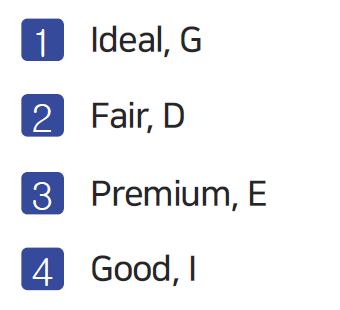

In [38]:
df = pd.read_csv("./diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [39]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


##### 4. df1, df2 데이터프레임을 위/아래 방향으로 연결하세요. (위에 df1이 있고 그 아래에 df2가 있어야합니다.)

In [45]:
from datetime import datetime
import numpy as np 
import pandas as pd

columns = ['open', 'high', 'low', 'close']
index1 = [
    datetime(2022, 9, 8),
    datetime(2022, 9, 7),
    datetime(2022, 9, 6),
    datetime(2022, 9, 5),
    datetime(2022, 9, 2)
]

index2 = [
    datetime(2022, 9, 1),
    datetime(2022, 8, 31),
    datetime(2022, 8, 30),
    datetime(2022, 8, 29),
    datetime(2022, 8, 26)
]

df1 = pd.DataFrame(data=np.arange(0, 20).reshape(5,4), index=index1, columns=columns)
df2 = pd.DataFrame(data=np.arange(20,40).reshape(5,4), index=index2, columns=columns)

In [46]:
df1.head()

,open,high,low,close
2022-09-08,0,1,2,3
2022-09-07,4,5,6,7
2022-09-06,8,9,10,11
2022-09-05,12,13,14,15
2022-09-02,16,17,18,19


In [47]:
df2.head()

,open,high,low,close
2022-09-01,20,21,22,23
2022-08-31,24,25,26,27
2022-08-30,28,29,30,31
2022-08-29,32,33,34,35
2022-08-26,36,37,38,39


In [49]:
pd.concat([df1, df2], axis = 0 )

,open,high,low,close
2022-09-08,0,1,2,3
2022-09-07,4,5,6,7
2022-09-06,8,9,10,11
2022-09-05,12,13,14,15
2022-09-02,16,17,18,19
2022-09-01,20,21,22,23
2022-08-31,24,25,26,27
2022-08-30,28,29,30,31
2022-08-29,32,33,34,35
2022-08-26,36,37,38,39


##### 5. 다음과 같은 df가 있다고 했을 때..

In [51]:
import pandas as pd
from datetime import datetime

data = {
    'Date': [datetime(2020, 12, 1), datetime(2021, 12, 1)],
    '삼성전자': [21.09, 13.55],
    '카카오': [221.53, 35.92],
    'NAVER': [47.97, 3.77],
    'SK하이닉스': [18.14, 9.93],
    '현대차': [37.33, 11.71]
}

df = pd.DataFrame(data=data)

df

,Date,삼성전자,카카오,NAVER,SK하이닉스,현대차
0,2020-12-01,21.09,221.53,47.97,18.14,37.33
1,2021-12-01,13.55,35.92,3.77,9.93,11.71


##### 이 데이터를 다음과 같은 형태로 변경하시오. 
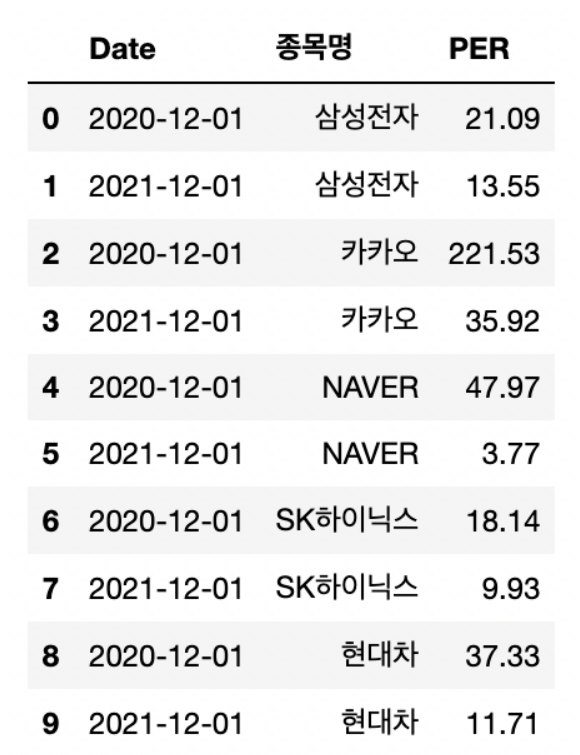

In [52]:
df

,Date,삼성전자,카카오,NAVER,SK하이닉스,현대차
0,2020-12-01,21.09,221.53,47.97,18.14,37.33
1,2021-12-01,13.55,35.92,3.77,9.93,11.71


In [60]:
df2 = pd.melt(df, id_vars=['Date'], var_name='종목명', value_name="PER")
df2

,Date,종목명,PER
0,2020-12-01,삼성전자,21.09
1,2021-12-01,삼성전자,13.55
2,2020-12-01,카카오,221.53
3,2021-12-01,카카오,35.92
4,2020-12-01,NAVER,47.97
5,2021-12-01,NAVER,3.77
6,2020-12-01,SK하이닉스,18.14
7,2021-12-01,SK하이닉스,9.93
8,2020-12-01,현대차,37.33
9,2021-12-01,현대차,11.71


##### 6. 다음과 같은 df가 있다고 했을 때..

In [61]:
import pandas as pd

data = [
    ["2021-08-12", "삼성전자", 77000],
    ["2021-08-13", "삼성전자", 74400],
    ["2021-08-12", "LG전자", 153000],
    ["2021-08-13", "LG전자", 150500],
    ["2021-08-12", "SK하이닉스", 100500],
    ["2021-08-13", "SK하이닉스", 101500]
]
columns = ["날짜", "종목명", "종가"]
df = pd.DataFrame(data=data, columns=columns)
df

,날짜,종목명,종가
0,2021-08-12,삼성전자,77000
1,2021-08-13,삼성전자,74400
2,2021-08-12,LG전자,153000
3,2021-08-13,LG전자,150500
4,2021-08-12,SK하이닉스,100500
5,2021-08-13,SK하이닉스,101500


#### 다음과 같이 변환하시오. 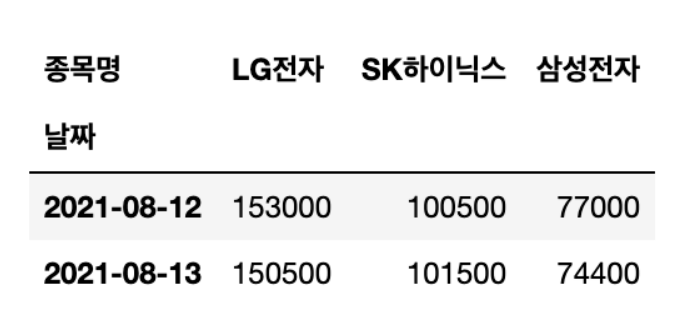

In [62]:
df2 = pd.pivot(df, index='날짜', columns='종목명', values='종가')
df2

종목명,LG전자,SK하이닉스,삼성전자
날짜,,,
2021-08-12,153000,100500,77000
2021-08-13,150500,101500,74400


#### 7. 아래와 같은 데이터프레임에서 'name' 컬럼을 전체 대문자로 변화하시오. 

In [90]:
data = {'name': ['Alice', 'Bob', 'Charie', 'David'], 
        'age' : [25,30,35,40]
       }
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data)
df3 = pd.DataFrame(data)
df4 = pd.DataFrame(data)
df5 = pd.DataFrame(data)

df1

,name,age
0,Alice,25
1,Bob,30
2,Charie,35
3,David,40


In [91]:
# apply는 사용자 정의 함수를 적용할 수 있어요.
def upper_case(x):
    return x.upper()

df1['name'] = df1['name'].apply(upper_case)

df1

,name,age
0,ALICE,25
1,BOB,30
2,CHARIE,35
3,DAVID,40


In [92]:
# 사용자 정의 함수는 lambda 로 만들어 휘발성이지만 빠르게 만들 수 있어요. 

df2['name'] = df2['name'].apply(lambda x: x.upper())
df2

,name,age
0,ALICE,25
1,BOB,30
2,CHARIE,35
3,DAVID,40


In [ ]:
#  map() 도 가능합니다. 
# df3['name'] = df3['name'].map(lambda x: x.upper())
# df3

In [86]:
# 만약에 이를 for 문을 돌렸다면?

def upper_case(x):
    return x.upper()

for i in range(len(df3['name'])):
    df3['name'][i] = upper_case(df3['name'][i])
    
df3

C:\Users\jhpark\AppData\Local\Temp\ipykernel_34836\146815696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['name'][i] = upper_case(df3['name'][i])


,name,age
0,ALICE,25
1,BOB,30
2,CHARIE,35
3,DAVID,40


In [89]:
df4['name'] = [upper_case(x) for x in df4['name']]
df4

,name,age
0,ALICE,25
1,BOB,30
2,CHARIE,35
3,DAVID,40


#### 8. 다음은 'gender'와 'marital_status' 컬럼을 갖는 데이터프레임 df가 있다. gender를 get_dummies() 함수를 적용하여 one-hot encoding 된 결과를 출력하시오.

In [99]:
import pandas as pd

data = {'gender': ['male', 'female', 'male', 'female'],
        'marital_status': ['single', 'married', 'single', 'divorced']}
df = pd.DataFrame(data)
df

,gender,marital_status
0,male,single
1,female,married
2,male,single
3,female,divorced


#### 최종 만들고 싶은 모습은 다음과 같다. 
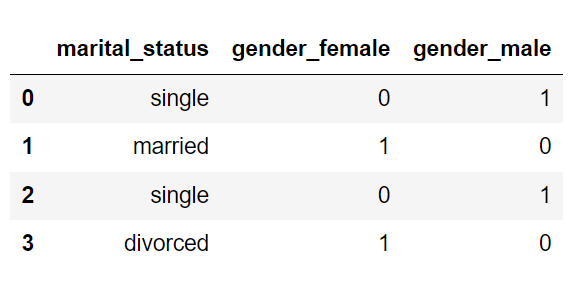

In [97]:
df2 = pd.get_dummies(df['gender'], prefix='gender')
df2

,gender_female,gender_male
0,0,1
1,1,0
2,0,1
3,1,0


In [101]:
df3 = pd.concat([df, df2], axis =1 )
df3 = df3.drop('gender', axis = 1)
df3

,marital_status,gender_female,gender_male
0,single,0,1
1,married,1,0
2,single,0,1
3,divorced,1,0


#### 9. 다음과 같은 데이터프레임에서 score가 80 이상이면 pass, 그렇지 않으면 fail로 처리하는 result 라는 열을 만드시오. 

In [103]:
import pandas as pd
import numpy as np

data = {'name': ['Alice', 'Bob', 'Charlie', 'David'], 
        'age' : [25,30,35,40],
        'score' : [70,80,90,85]
       }
df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data)
df3 = pd.DataFrame(data)

df1

,name,age,score
0,Alice,25,70
1,Bob,30,80
2,Charlie,35,90
3,David,40,85


In [104]:
def get_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'D'

df1['grade'] = df1['score'].apply(get_grade)

df1

,name,age,score,grade
0,Alice,25,70,C
1,Bob,30,80,B
2,Charlie,35,90,A
3,David,40,85,B


In [105]:
df2['grade'] = df2['score'].apply(lambda x: 'A' if x >= 90 else ('B' if x >= 80 else ('C' if x >= 70 else 'D')))
df2

,name,age,score,grade
0,Alice,25,70,C
1,Bob,30,80,B
2,Charlie,35,90,A
3,David,40,85,B


In [106]:
df3['result'] = np.where(df3['score'] >=80, 'pass', 'fail')
df3

,name,age,score,result
0,Alice,25,70,fail
1,Bob,30,80,pass
2,Charlie,35,90,pass
3,David,40,85,pass
